In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
data = np.load('./data.npy')
label = np.load('./label.npy')
print(label.shape, data.shape)

(7500, 3) (7500, 2)


In [3]:
x_train, x_val, y_train, y_val = train_test_split(data, label,
                                                  test_size = 0.3, random_state = 1)

In [4]:
feature_num = len(x_train[0])
sample_num = len(x_train)
print(x_train[:5])
print(y_train[:5])

[[-2.11046974  1.26682769]
 [-0.14029491 -1.6246758 ]
 [-0.23036896  2.47230988]
 [ 0.12715568  1.7900359 ]
 [ 0.00855322  2.44490269]]
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]]


In [5]:
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
w = np.random.randn(feature_num, len(y_train[0]))
w = tf.Variable(w, dtype=tf.float32)
b = np.random.randn(1, len(y_train[0]))
b = tf.Variable(b, dtype=tf.float32)

In [6]:

def softmax(z):
    z = tf.exp(z)
    summ = tf.reduce_sum(z, axis=1)
    summ = tf.reshape(summ, shape=[-1, 1])
    return z/summ
y_pred = tf.matmul(x, w) + b
y_pred = softmax(y_pred)

In [7]:
def softmax_cross_entropy(y_pred, y):
    return tf.reduce_mean(-tf.reduce_sum(tf.log(y_pred) * y, axis=1), axis=0)
loss = softmax_cross_entropy(y_pred, y)
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_pred))

In [8]:
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
fit = optimizer.minimize(loss)

In [9]:
init = tf.global_variables_initializer()
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
# sess = tf.Session()
sess.run(init)

In [10]:
mini_batch = 200
epoch = 1000
history_loss = []
history_val_loss = []
history_val_acc = []
for i in range(epoch):
    iter_num = int(sample_num//mini_batch)
    avg_loss = 0.
    for j in range(iter_num):
        _, L = sess.run([fit, loss], feed_dict={
            x : x_train[j*mini_batch : (j+1)*mini_batch],
            y : y_train[j*mini_batch : (j+1)*mini_batch]
        })
        avg_loss += L
    avg_loss = avg_loss/float(iter_num)
    history_loss.append(avg_loss)
    val_loss, y_hat = sess.run([loss, y_pred], feed_dict={x : x_val, y : y_val})
    history_val_loss.append(val_loss)
    
    y_hat = np.argmax(y_hat, axis=1)
    y_true = np.argmax(y_val, axis=1)
    res = (y_hat==y_true)
    res = res.reshape([-1])
    val_acc = len(np.where(res==True)[0])/len(y_hat)
    history_val_acc.append(val_acc)
    if i%10 == 0:
        print('--- epoch: %d, loss: %f, val_loss: %f, val_acc: %f ---'%(i+1, avg_loss, val_loss, val_acc))

--- epoch: 1, loss: 1.392620, val_loss: 1.279668, val_acc: 0.324000 ---
--- epoch: 11, loss: 0.365717, val_loss: 0.358247, val_acc: 0.940444 ---
--- epoch: 21, loss: 0.223170, val_loss: 0.220819, val_acc: 0.982222 ---
--- epoch: 31, loss: 0.168147, val_loss: 0.166994, val_acc: 0.987556 ---
--- epoch: 41, loss: 0.137834, val_loss: 0.137285, val_acc: 0.989333 ---
--- epoch: 51, loss: 0.118310, val_loss: 0.118148, val_acc: 0.991111 ---
--- epoch: 61, loss: 0.104559, val_loss: 0.104674, val_acc: 0.992444 ---
--- epoch: 71, loss: 0.094290, val_loss: 0.094618, val_acc: 0.993333 ---
--- epoch: 81, loss: 0.086295, val_loss: 0.086795, val_acc: 0.993333 ---
--- epoch: 91, loss: 0.079874, val_loss: 0.080516, val_acc: 0.993333 ---
--- epoch: 101, loss: 0.074589, val_loss: 0.075354, val_acc: 0.993778 ---
--- epoch: 111, loss: 0.070153, val_loss: 0.071026, val_acc: 0.993778 ---
--- epoch: 121, loss: 0.066372, val_loss: 0.067339, val_acc: 0.994667 ---
--- epoch: 131, loss: 0.063104, val_loss: 0.06415

In [11]:
print(sess.run([w,b]))


[array([[-2.5579586 ,  0.80352044,  2.94322705],
       [ 1.01502991, -3.74156356,  2.75530171]], dtype=float32), array([[-1.90957618,  0.69186032,  0.12818781]], dtype=float32)]


total acc: 0.996133


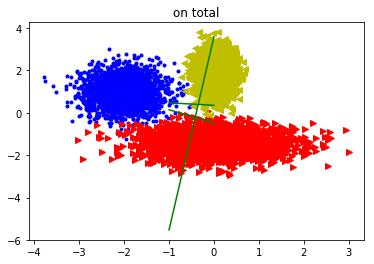

In [12]:

# use the result of w and b# use th 
w1 = -(-4.03257)/  0.4433
b1 = -(-1.585) / 0.4433

w2 = -(-0.4412)/-3.68584
b2 = -(1.3036)/-3.68584

w3 = -(1.1094)/1.790590
b3 = -(0.84876)/1.790590


x1 = -1
x2 = 0
y1 = w1*x1 + b1
y2 = w1*x2 + b1

y3 = w2*x1 + b2
y4 = w2*x2 + b2

y5 = w3*x1 + b3
y6 = w3*x2 + b3

plt.figure(2)
plt.title('on total')
plt.plot(data[0:2500, 0], data[0:2500, 1], '.b')
plt.plot(data[2500:5000, 0], data[2500:5000, 1], '>r')
plt.plot(data[5000:7500, 0], data[5000:7500, 1], '<y')
plt.plot([x1, x2], [y1, y2], 'g')
plt.plot([x1, x2], [y3, y4], 'g')
plt.plot([x1, x2], [y5, y6], 'g')

y_hat = sess.run(y_pred, feed_dict={x : data, y : label})

y_hat = np.argmax(y_hat, axis=1)
y_true = np.argmax(label, axis=1)
res = (y_hat==y_true)
res = res.reshape([-1])
total_acc = len(np.where(res==True)[0])/len(y_hat)
print('total acc: %f'%total_acc)

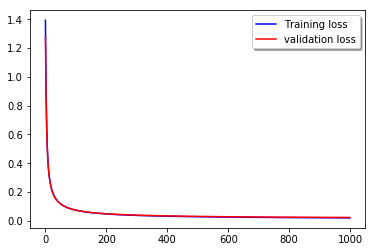

In [13]:
# epoch-loss curve# epoch- 
plt.figure(1)
fig, ax = plt.subplots(1,1)
ax.plot(history_loss, color='b', label="Training loss")
ax.plot(history_val_loss, color='r', label="validation loss",axes =ax)
legend = ax.legend(loc='best', shadow=True)